First we downloading data set from UCI ML Repository.
> !wget is shell command

# Data Analysis

In [1]:
!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

--2020-09-27 20:07:10--  http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30286 (30K) [application/x-httpd-php]
Saving to: ‘auto-mpg.data’

auto-mpg.data       100%[===================>]  29.58K   122KB/s    in 0.2s    

2020-09-27 20:07:10 (122 KB/s) - ‘auto-mpg.data’ saved [30286/30286]



In [3]:
 ##now we just importing a few libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ## plot few charts

In [4]:
## try reading the .data file using pandas
cols = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin']

df = pd.read_csv('./auto-mpg.data', names = cols, na_values = "?",
                comment = '\t',
                sep = " ",
                skipinitialspace = True)
data = df.copy()

In [6]:
data.sample(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
308,33.5,4,151.0,90.0,2556.0,13.2,79,1
383,38.0,4,91.0,67.0,1965.0,15.0,82,3
356,32.4,4,108.0,75.0,2350.0,16.8,81,3
385,38.0,4,91.0,67.0,1995.0,16.2,82,3
54,35.0,4,72.0,69.0,1613.0,18.0,71,3
142,26.0,4,79.0,67.0,1963.0,15.5,74,2
83,28.0,4,98.0,80.0,2164.0,15.0,72,1
361,25.4,6,168.0,116.0,2900.0,12.6,81,3
310,38.1,4,89.0,60.0,1968.0,18.8,80,3
60,20.0,4,140.0,90.0,2408.0,19.5,72,1


In [7]:
##1. checking the data info like columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [8]:
## checking for all the null values
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [9]:
## summary statistics of quantitative variables
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


<AxesSubplot:xlabel='Horsepower'>

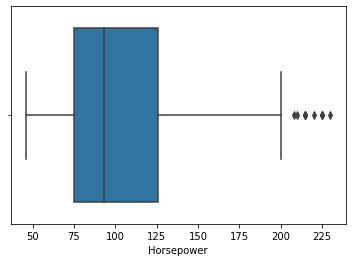

In [10]:
sns.boxplot(x=data['Horsepower'])

In [11]:
## imputing the values with median
median = data['Horsepower'].median()
data['Horsepower'] = data['Horsepower'].fillna(median)
## fillna all the na value fill with specified

In [12]:
## category distribution
data["Cylinders"].value_counts() / len(data)
## it gives the basic idea like more than 50% vehicles have 4 cylinders
## it also gives idea about how our testing data should be.

4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: Cylinders, dtype: float64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


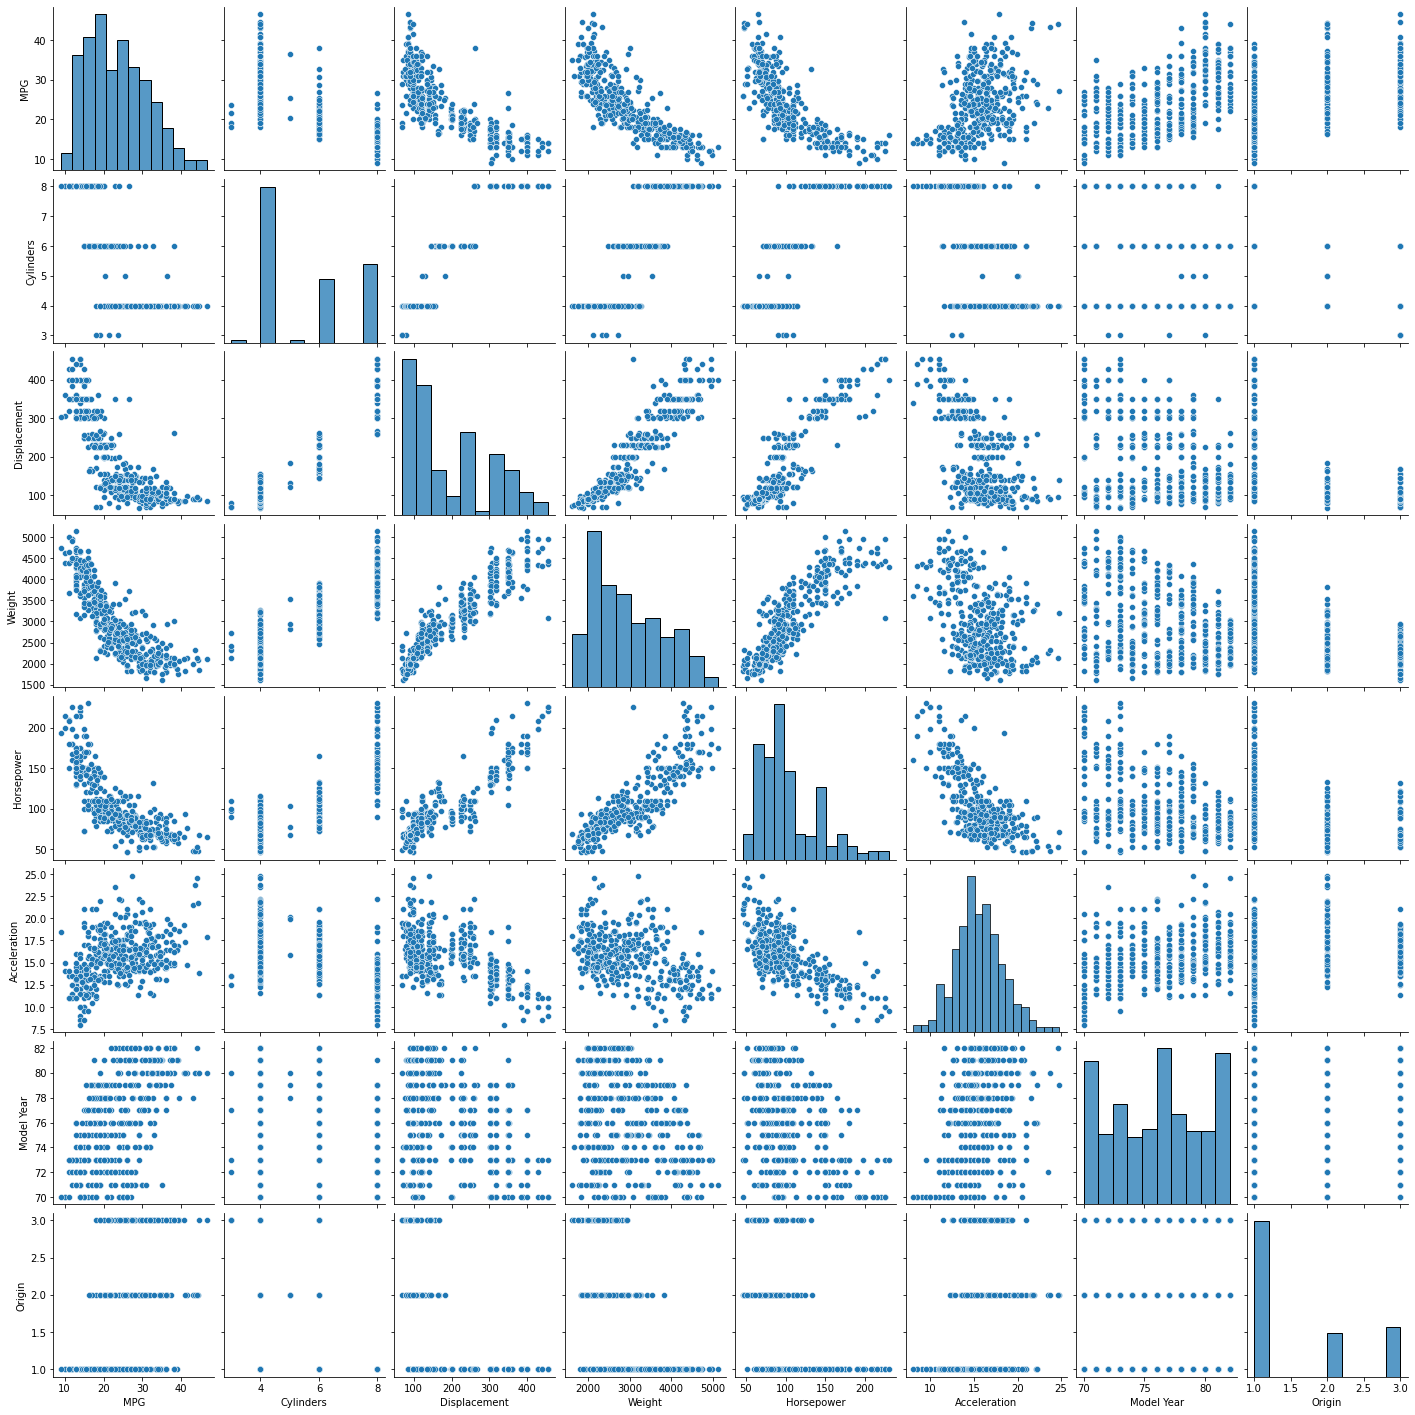

In [14]:
## pair plot to get an intution of potential correlations
sns.pairplot(data[["MPG","Cylinders","Displacement","Weight","Horsepower", "Acceleration","Model Year", "Origin"]])